# IA2A - DESAFIO 1

## º Dados
Os dados que serão utilizados consistem de uma planilha .xlsx contendo
uma tabela com dados de 17 (identificados na coluna Seq) sensores em 7 máquinas
(identificadas por VN sendo N o número da máquina).
## º Objetivo
Identificar com base nos dados qual máquina possui defeito, sendo que apenas uma delas está com falha.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
from matplotlib import patches as mpatches

In [20]:
colors = ['red', 'green', 'yellow', 'blue', 'pink', 'purple', 'orange', 'cyan']
color_v1 = mpatches.Patch(color='red', label='V1')
color_v2 = mpatches.Patch(color='green', label='V2')
color_v3 = mpatches.Patch(color='yellow', label='V3')
color_v4 = mpatches.Patch(color='blue', label='V4')
color_v5 = mpatches.Patch(color='pink', label='V5')
color_v6 = mpatches.Patch(color='purple', label='V6')
color_v7 = mpatches.Patch(color='orange', label='V7')
color_v8 = mpatches.Patch(color='cyan', label='V8')


# Importação dos dados utilizando pandas
- df será utilizado como alias para DataFrame
- a coluna Seq será excluida pois não existe a necessidade de descobrir se um sensor especifico possuí defeito

In [2]:
df = pd.read_excel('Defective_Equipment.xlsx')
df.head(18)

,Seq,V1,V2,V3,V4,V5,V6,V7,V8
0,1,375,135,458,475,509,336,469,492
1,2,57,47,53,73,63,62,63,58
2,3,245,267,242,227,271,219,268,286
3,4,1472,1494,1462,1582,1613,1323,1490,1493
4,5,105,66,103,103,118,98,101,118
5,6,54,41,62,64,55,59,63,59
6,7,193,209,184,235,207,172,223,156
7,8,147,93,122,160,139,130,152,101
8,9,1102,674,957,1137,1058,990,1098,878
9,10,720,1033,566,874,628,646,706,320


In [3]:
df.drop('Seq', axis=1, inplace=True)
df.describe()

,V1,V2,V3,V4,V5,V6,V7,V8
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000
mean,469.647059,429.941176,460.235294,503.941176,510.176471,422.588235,492.882353,444.470588
std,452.701466,479.896014,469.595907,463.859282,517.552562,405.843267,480.721448,491.302748
min,54.000000,41.000000,53.000000,64.000000,55.000000,59.000000,63.000000,58.000000
25%,156.000000,135.000000,147.000000,175.000000,167.000000,138.000000,164.000000,118.000000
50%,253.000000,209.000000,242.000000,265.000000,271.000000,226.000000,268.000000,286.000000
75%,685.000000,586.000000,566.000000,803.000000,628.000000,615.000000,699.000000,492.000000
max,1472.000000,1506.000000,1572.000000,1582.000000,1734.000000,1323.000000,1597.000000,1684.000000


In [4]:
df.median()

V1    253.0
V2    209.0
V3    242.0
V4    265.0
V5    271.0
V6    226.0
V7    268.0
V8    286.0
dtype: float64

In [6]:
df.transpose().describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
count,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000
mean,406.125000,59.500000,253.125000,1491.125000,101.500000,57.125000,197.375000,130.500000,986.75000,686.625000,199.625000,718.125000,439.125000,205.50000,350.625000,1494.750000,157.000000
std,124.637116,7.745967,23.454744,86.688997,16.186414,7.434235,26.332693,23.982136,152.99183,210.654041,58.867739,87.633062,79.641047,21.45427,18.438605,188.474136,14.282857
min,135.000000,47.000000,219.000000,1323.000000,66.000000,41.000000,156.000000,93.000000,674.00000,320.000000,99.000000,586.000000,313.000000,176.00000,322.000000,1235.000000,138.000000
25%,365.250000,56.000000,238.250000,1469.500000,100.250000,54.750000,181.000000,116.750000,937.25000,612.500000,164.000000,667.500000,402.250000,195.25000,336.250000,1344.500000,145.000000
50%,463.500000,60.000000,256.000000,1491.500000,103.000000,59.000000,200.000000,134.500000,1024.00000,676.000000,209.500000,724.500000,451.000000,203.50000,354.000000,1539.000000,160.000000
75%,479.250000,63.000000,268.750000,1516.000000,108.250000,62.250000,212.500000,148.250000,1099.00000,758.500000,248.500000,783.500000,472.250000,211.75000,363.500000,1618.750000,167.750000
max,509.000000,73.000000,286.000000,1613.000000,118.000000,64.000000,235.000000,160.000000,1137.00000,1033.000000,265.000000,830.000000,570.000000,247.00000,376.000000,1734.000000,175.000000


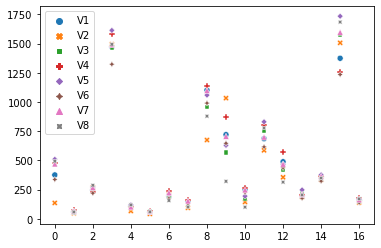

In [8]:
sns.scatterplot(data=df)

## Executando PCA
- Depois de olhar os dados foi decidido utilizar o PCA para tentar idenficar um padrão nas máquinas

In [43]:
def do_pca(data_frame):
  pca = PCA(n_components=2)
  x = pca.fit_transform(data_frame.transpose())
  return x

def show_scatterplot(x, y):
  fig, ax = plt.subplots()
  ax.scatter(x, y, c=colors)
  ax.legend(handles=[color_v1, color_v2, color_v3, color_v4, color_v5, color_v6, color_v7, color_v8])
  
  a, b = np.polyfit(x, y, 1)
  plt.plot(x, a*x+b)  
  
  plt.show()

In [44]:
data = do_pca(df)
data

array([[-104.59355731, -141.25147911],
       [-389.37294513,  403.68325772],
       [ 151.66489897,   40.22759993],
       [-213.02127995, -307.21339479],
       [ 246.22150779,  -24.74798824],
       [-171.47665622,  -64.09170241],
       [  61.98694698,  -75.36289975],
       [ 418.59108486,  168.75660666]])

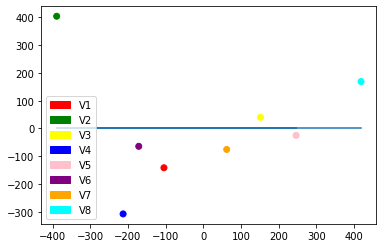

In [45]:
show_scatterplot(data[:, 0], data[:, 1])

## Tratamento com escala aplicada a os dados 
Neste passo será aplicado uma escala para que os dados possuam mesmo peso, pois após algumas pesquisas vi que existe a necessidade de normalizar os dados para um bom resultado.

Como PCA precisa de dados:
- zero mean
- unit variance

Vai ser usado o StandardScaler

In [46]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.values)

df_scaled = pd.DataFrame(data_scaled, index=df.index, columns=df.columns)
df_scaled

,V1,V2,V3,V4,V5,V6,V7,V8
0,-0.215506,-0.633509,-0.004907,-0.064312,-0.002343,-0.219920,-0.051209,0.099719
1,-0.939575,-0.822526,-0.893893,-0.957627,-0.890613,-0.915836,-0.921766,-0.810834
2,-0.511509,-0.349984,-0.479033,-0.615412,-0.476353,-0.517081,-0.482199,-0.332479
3,2.282303,2.285509,2.198902,2.395635,2.196423,2.286901,2.138048,2.199864
4,-0.830281,-0.781715,-0.784142,-0.890961,-0.781073,-0.824402,-0.840285,-0.684951
5,-0.946406,-0.835413,-0.874138,-0.977626,-0.906546,-0.923455,-0.921766,-0.808736
6,-0.629910,-0.474563,-0.606344,-0.597634,-0.603817,-0.636454,-0.578689,-0.605225
7,-0.734650,-0.723721,-0.742436,-0.764297,-0.739248,-0.743127,-0.730929,-0.720618
8,1.439833,0.524218,1.090413,1.406767,1.091065,1.441134,1.297510,0.909565
9,0.570040,1.295320,0.232157,0.822335,0.234662,0.567430,0.456973,-0.261145


In [47]:
data = do_pca(data_scaled)
data

array([[-0.20617385, -0.31542412],
       [-0.80317237,  0.86715903],
       [ 0.36147642,  0.06291455],
       [-0.52029838, -0.54595107],
       [ 0.3582807 ,  0.05872298],
       [-0.20217457, -0.31022563],
       [ 0.08167644, -0.08343128],
       [ 0.9303856 ,  0.26623554]])

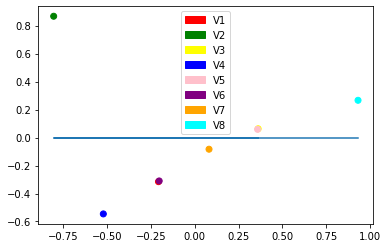

In [48]:
show_scatterplot(data[:, 0], data[:, 1])

# Conclusão

Observando que a V2 possui a maior distancia do eixo, ela é a máquina que possui o defeito.

### Referências
- [Necessidade de normalizar os dados para o PCA](https://www.researchgate.net/post/Is-it-necessary-to-normalize-data-before-performing-principle-component-analysis)
- [Scalers para usar no PCA](https://stackoverflow.com/questions/37221425/which-feature-scaling-method-to-use-before-pca)
- [Como fazer o best fit](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html)